### <font color='red'> Project 2- Mitali Bharali - Group 12

Project Description:
- Use same datasets as Project 1.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project2_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project2_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project2_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
audit_risk = pd.read_csv('audit_risk.csv')
trial = pd.read_csv('trial.csv')

In [3]:
audit_risk.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [4]:
trial.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


In [5]:
audit_risk.isna().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [6]:
trial.isna().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [7]:
nan_rows = audit_risk[audit_risk['Money_Value'].isnull()]
nan_rows

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
642,55.57,4,0.23,0.2,0.046,0.0,0.2,0.0,0.23,5.0,...,0.4,0,0.2,0.0,2.0,1.446,0.4,0.5,0.2892,0


In [8]:
nan_rows_trial = trial[trial['Money_Value'].isnull()]
nan_rows_trial


,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
642,55.57,4,0.23,2,0.0,2,0.23,5.0,2,NaN,2,2,0,2,0,2,2.0,0


In [9]:
audit_risk.dtypes

Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

In [10]:
audit_risk.fillna(audit_risk.median(), inplace=True)

In [11]:
audit_risk.isna().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [12]:
trial.fillna(trial.median(), inplace=True)

In [13]:
trial.isna().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      0
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [14]:
audit_risk.info()

trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       776 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

In [15]:
audit_risk.describe(include = 'O')
                        

,LOCATION_ID
count,776
unique,45
top,8
freq,76


In [16]:
audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       776 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

In [17]:
audit_risk=audit_risk.drop(['Risk'],axis=1)
audit_risk

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,3.89,23,4.18,0.6,2.508,2.5000,0.2,0.50000,6.6800,5.0,...,0.2,0.4,0,0.2,0.0,2.4,8.57400,0.4,0.5,1.714800
1,3.89,6,0.00,0.2,0.000,4.8300,0.2,0.96600,4.8300,5.0,...,0.2,0.4,0,0.2,0.0,2.0,2.55400,0.4,0.5,0.510800
2,3.89,6,0.51,0.2,0.102,0.2300,0.2,0.04600,0.7400,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.54800,0.4,0.5,0.309600
3,3.89,6,0.00,0.2,0.000,10.8000,0.6,6.48000,10.8000,6.0,...,0.2,0.4,0,0.2,0.0,4.4,17.53000,0.4,0.5,3.506000
4,3.89,6,0.00,0.2,0.000,0.0800,0.2,0.01600,0.0800,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.41600,0.4,0.5,0.283200
5,3.89,6,0.00,0.2,0.000,0.8300,0.2,0.16600,0.8300,5.0,...,0.2,0.4,0,0.2,0.0,2.0,2.15600,0.4,0.5,0.431200
6,3.89,7,1.10,0.4,0.440,7.4100,0.4,2.96400,8.5100,5.0,...,0.2,0.4,0,0.2,0.0,3.2,31.77400,0.4,0.5,6.354800
7,3.89,8,8.50,0.6,5.100,12.0300,0.6,7.21800,20.5300,5.5,...,0.2,0.4,0,0.2,0.0,4.2,18.03400,0.4,0.5,3.606800
8,3.89,8,8.40,0.6,5.040,11.0500,0.6,6.63000,19.4500,5.5,...,0.2,0.4,0,0.2,0.0,4.2,17.20600,0.4,0.5,3.441200
9,3.89,8,3.98,0.6,2.388,0.9900,0.2,0.19800,4.9700,5.0,...,0.2,0.4,0,0.2,0.0,2.4,4.37200,0.4,0.5,0.874400


In [18]:
audit_risk = audit_risk.drop_duplicates(keep='first')
audit_risk.shape

(763, 26)

In [19]:
trial = trial.drop_duplicates(keep='first')
trial.shape

(763, 18)

In [20]:
result = audit_risk.join(trial.set_index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers', 'Money_Value',
       'History', 'Score']), on= ['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers', 'Money_Value',
       'History', 'Score'])

In [21]:
result=result.drop(['SCORE_A','SCORE_B'],axis=1)

In [22]:
result.isna().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Marks             0
MONEY_Marks       0
District          0
Loss              0
LOSS_SCORE        0
History_score     0
Risk              0
dtype: int64

In [23]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 775
Data columns (total 33 columns):
Sector_score      763 non-null float64
LOCATION_ID       763 non-null object
PARA_A            763 non-null float64
Score_A           763 non-null float64
Risk_A            763 non-null float64
PARA_B            763 non-null float64
Score_B           763 non-null float64
Risk_B            763 non-null float64
TOTAL             763 non-null float64
numbers           763 non-null float64
Score_B.1         763 non-null float64
Risk_C            763 non-null float64
Money_Value       763 non-null float64
Score_MV          763 non-null float64
Risk_D            763 non-null float64
District_Loss     763 non-null int64
PROB              763 non-null float64
RiSk_E            763 non-null float64
History           763 non-null int64
Prob              763 non-null float64
Risk_F            763 non-null float64
Score             763 non-null float64
Inherent_Risk     763 non-null float64
CON

In [24]:
result = result.dropna()

In [25]:
result.shape

(763, 33)

In [26]:
dup = result.duplicated(subset=None, keep = 'first')
dup

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
744    False
745    False
746    False
747    False
748    False
749    False
750    False
751    False
752    False
753    False
754    False
755    False
756    False
757    False
758    False
759    False
760    False
762    False
763    False
764    False
765    False
766    False
767    False
768    False
769    False
770    False
772    False
773    False
774    False
775    False
Length: 763, dtype: bool

In [27]:
dup.sum()

0

In [28]:
result=result.drop_duplicates(keep='first')

In [29]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 775
Data columns (total 33 columns):
Sector_score      763 non-null float64
LOCATION_ID       763 non-null object
PARA_A            763 non-null float64
Score_A           763 non-null float64
Risk_A            763 non-null float64
PARA_B            763 non-null float64
Score_B           763 non-null float64
Risk_B            763 non-null float64
TOTAL             763 non-null float64
numbers           763 non-null float64
Score_B.1         763 non-null float64
Risk_C            763 non-null float64
Money_Value       763 non-null float64
Score_MV          763 non-null float64
Risk_D            763 non-null float64
District_Loss     763 non-null int64
PROB              763 non-null float64
RiSk_E            763 non-null float64
History           763 non-null int64
Prob              763 non-null float64
Risk_F            763 non-null float64
Score             763 non-null float64
Inherent_Risk     763 non-null float64
CON

In [30]:
result.LOCATION_ID.replace(['LOHARU', 'NUH', 'SAFIDON'], [10, 26, 45], inplace=True)
result.dtypes


Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Marks               int64
MONEY_Marks         int64
District            int64
Loss                int64
LOSS_SCORE          int64
History_score       int64
Risk                int64
dtype: object

In [31]:
result["LOCATION_ID"]=result["LOCATION_ID"].astype(int)
result.dtypes

Sector_score      float64
LOCATION_ID         int32
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Marks               int64
MONEY_Marks         int64
District            int64
Loss                int64
LOSS_SCORE          int64
History_score       int64
Risk                int64
dtype: object

In [32]:
def plot_corr(result,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = result.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

In [33]:
rc = result.corr()
print(rc)

                Sector_score  LOCATION_ID    PARA_A   Score_A    Risk_A  \
Sector_score        1.000000    -0.054881 -0.212488 -0.417980 -0.215317   
LOCATION_ID        -0.054881     1.000000 -0.008273  0.074465 -0.006064   
PARA_A             -0.212488    -0.008273  1.000000  0.494335  0.999277   
Score_A            -0.417980     0.074465  0.494335  1.000000  0.502990   
Risk_A             -0.215317    -0.006064  0.999277  0.502990  1.000000   
PARA_B             -0.130719     0.005488  0.160693  0.247950  0.164133   
Score_B            -0.210417     0.121297  0.355618  0.568595  0.360367   
Risk_B             -0.128688     0.005144  0.160618  0.246756  0.164016   
TOTAL              -0.150939     0.005253  0.265743  0.295824  0.269016   
numbers            -0.149438     0.005455  0.132210  0.240587  0.134158   
Score_B.1          -0.167585    -0.018951  0.138827  0.272179  0.141426   
Risk_C             -0.163772    -0.016387  0.138702  0.263648  0.141093   
Money_Value        -0.115

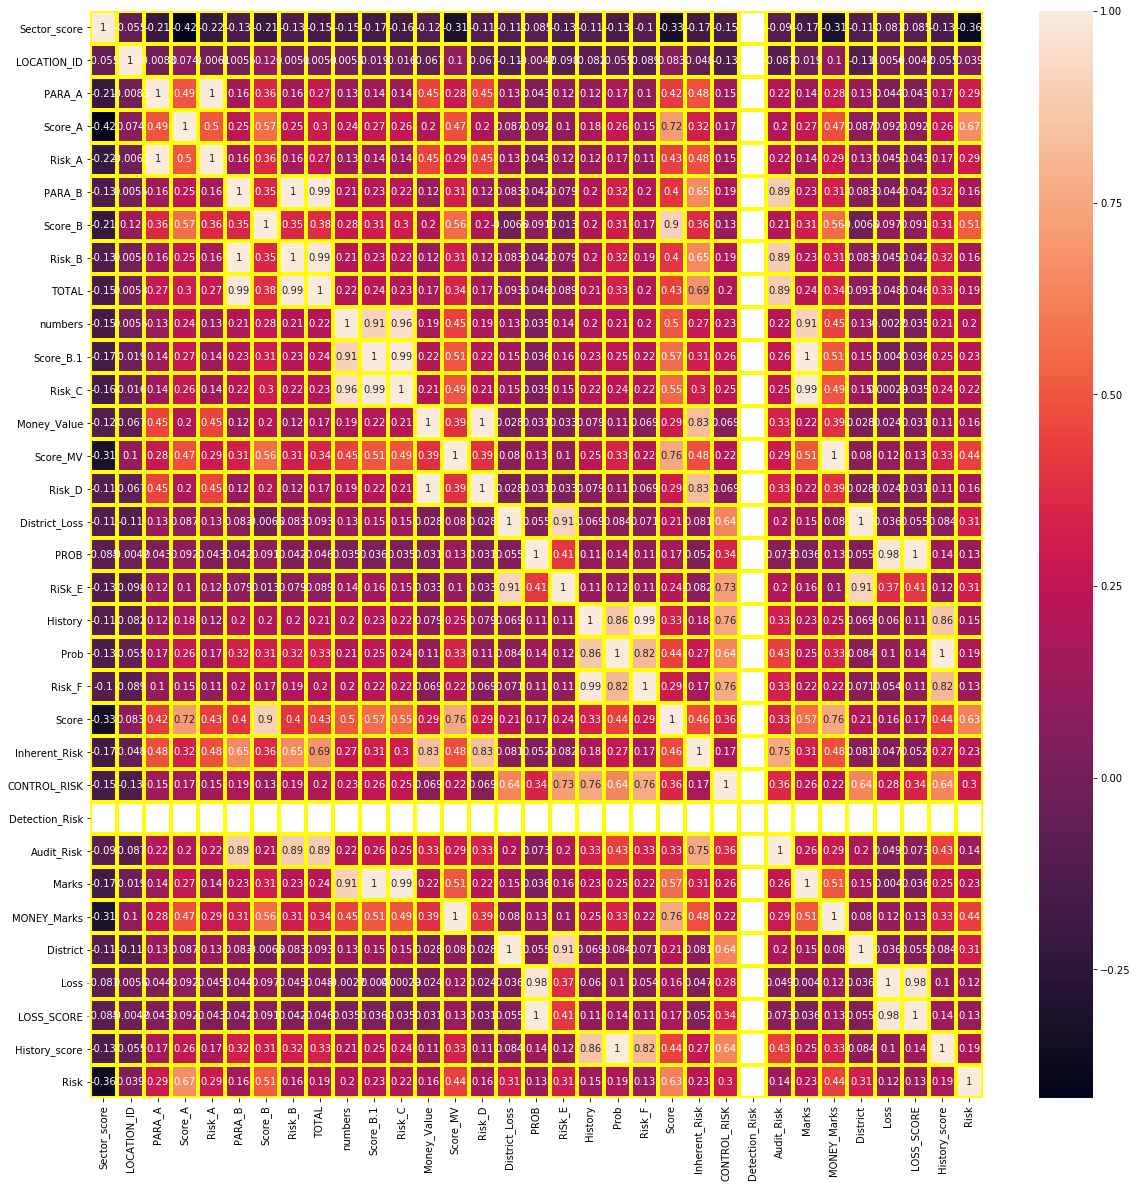

In [255]:
#CORREL MATRIX
import seaborn as sns

fig=plt.figure(figsize=(20,20))
sns.heatmap(rc,annot= True,linecolor='yellow',linewidths=3)

In [34]:
x = result[['Sector_score','PARA_A','PARA_B','numbers','Money_Value','History','Score','District_Loss','Loss']]
y = result[['Audit_Risk']]

After a final analysis, the feature set was decided to include the outliers as well the specific features without much correlation. The Risk has been removed because it is an interval reflection of the Audit Risk value.

The Audit Risk and the trial table has been merged as one final dataset and while merging, the Risk column from the Audit_risk table has been removed as the same column was present even in the trial table and that was the main column to be used as the risk from the Audit Risk table was just an extension of the Audit Risk value. Similarly, the SCORE_A and the SCORE_B column from the tiral table has been removed as they were present in the Audit Risk table and were on a different scale(it was scaled by 10). Finally, the LOCATION_ID was converted to numeric and each of the letter values were converted to numeric. The money_marks and Score_MV were the same values on a different scale and they were also dropped from the feature set for the same purpose.

## Data Visualization


In [35]:
import seaborn as sns 

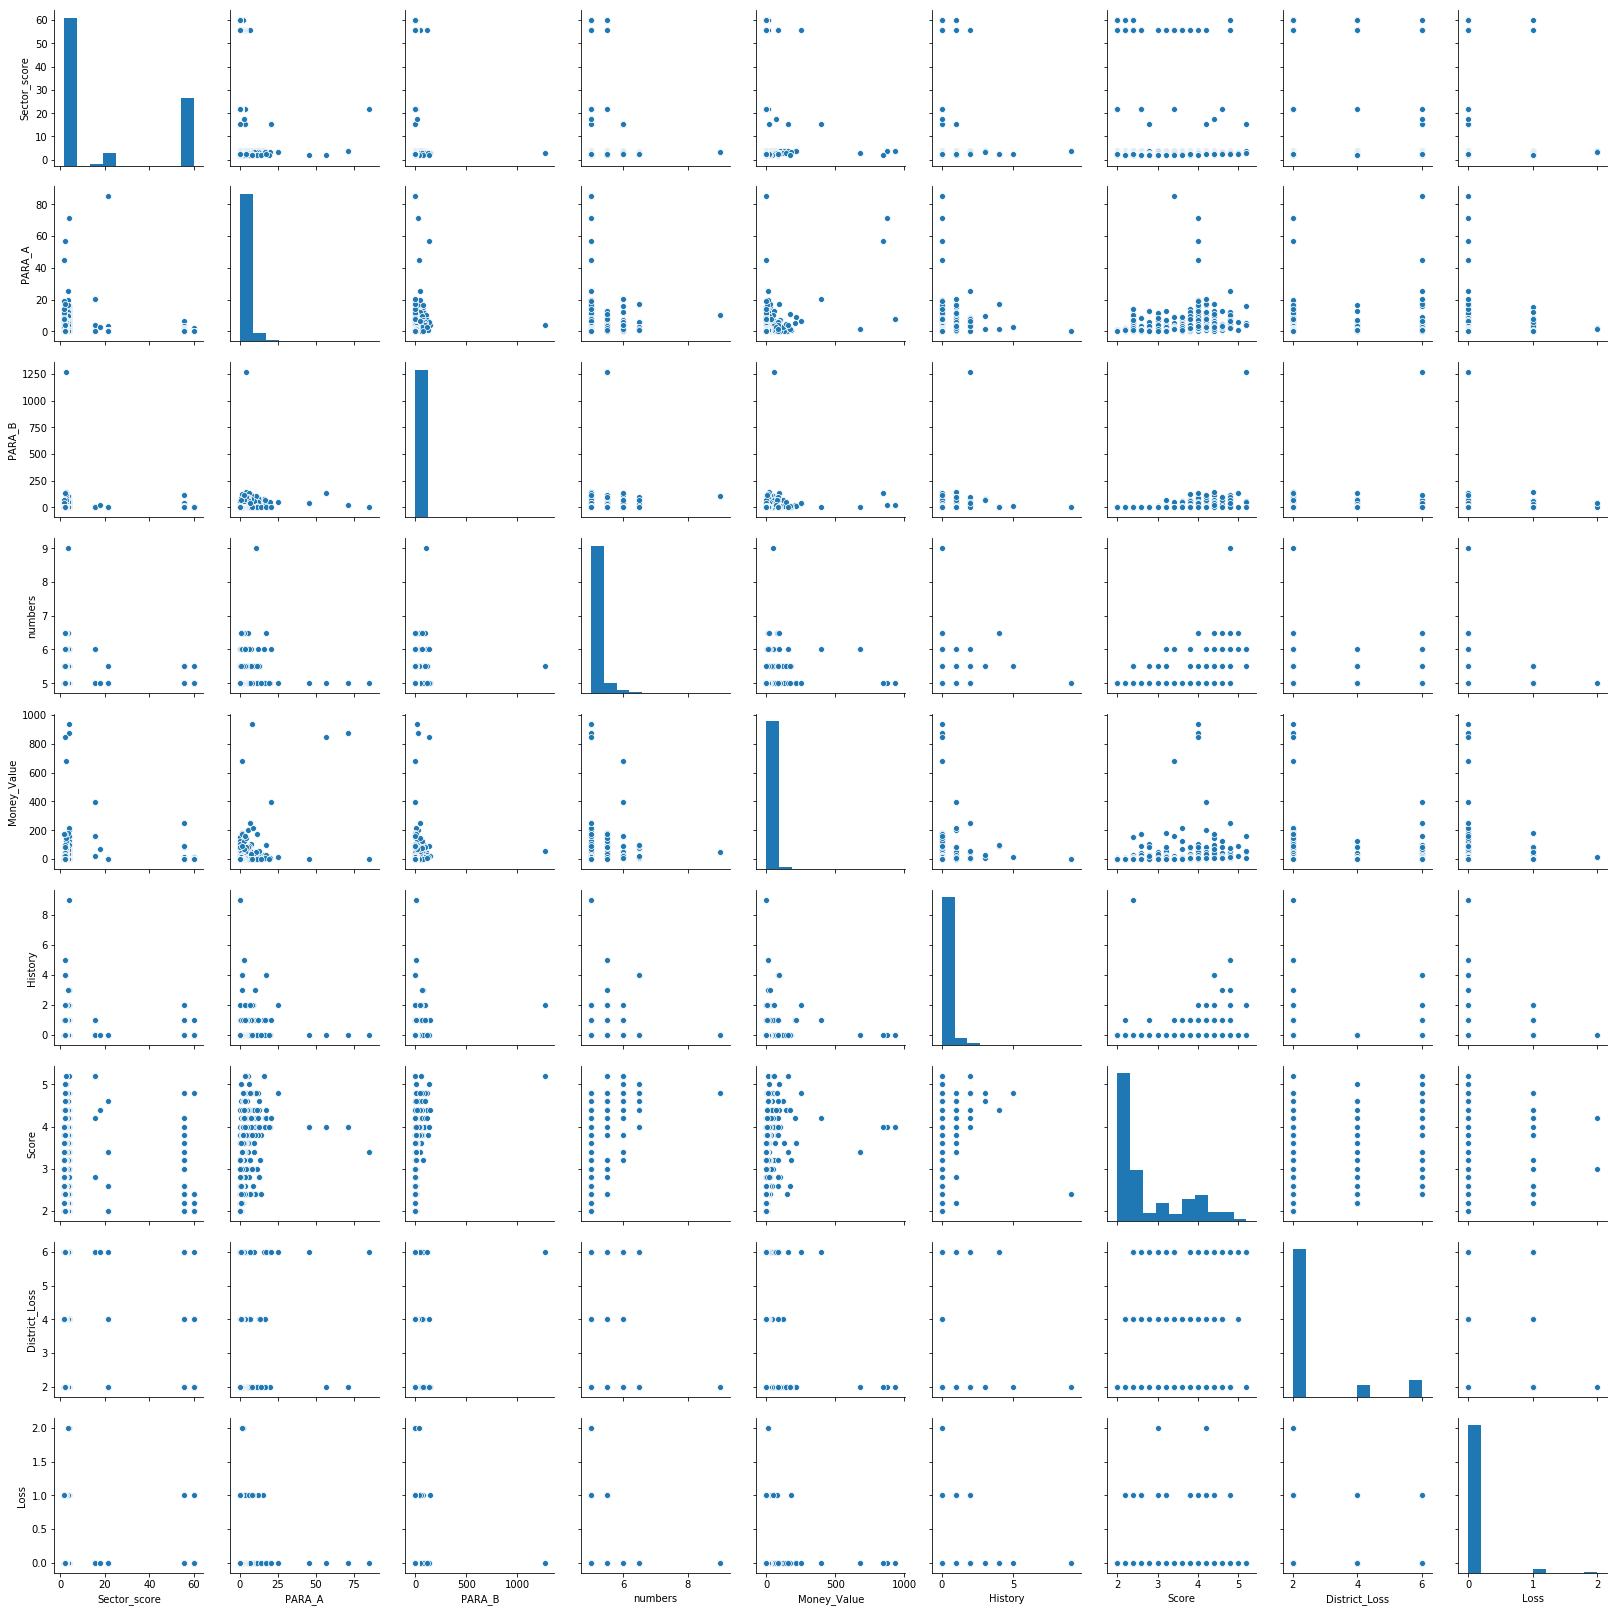

In [36]:
sns.pairplot(x)

In [37]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(x,y, random_state = 0)



For each of the values in the combined Result dataset, a correlation heat map was made to check for the overall correlation between the columns to decide the final feature dataset. The boxplot in each case, has been utilized to check for outliers and determine whether they should be included in the final feature set. In comparison to the previoud project, the outliers have been left in the feature set because they are of utmost importance in judging the risk factors as compared to our previous cases. The reason being that such firms with a high risk factor and probability are the ones most likely to default and hence, cannot be ignored.

## Bagging and Pasting

Bagging -

Linear and Ridge Regression 

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
#base model

lreg = LinearRegression()

#grid params
grid_param = {'n_estimators':[300, 400, 500, 600, 700], 
             'max_samples':[50, 100, 150, 200, 250, 300]}

#grid search model
bag_grid= GridSearchCV(BaggingRegressor(lreg), grid_param, cv = 3, return_train_score=True)

#train grid search model
bag_grid.fit(X_train, y_train)

#find the best params
print('Best param:', bag_grid.best_params_)
print('Best score:', bag_grid.best_score_)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Best param: {'max_samples': 50, 'n_estimators': 500}
Best score: 0.4827047444401013


In [39]:
bag_lreg = BaggingRegressor(lreg, n_estimators=300, max_samples=50, bootstrap=True, random_state=0)
bag_lreg.fit(X_train, y_train)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=50, n_estimators=300, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [40]:
bag_lreg.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_lreg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_lreg.score(X_test, y_test)))

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.56
Test score: 0.68


In [41]:
from sklearn.linear_model import Ridge

ridge = Ridge()

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge_grid = GridSearchCV(ridge, param_grid, cv=5, return_train_score=True)


#grid search model
#log_grid= GridSearchCV(logreg, grid_param, cv = 3, n_jobs= -1, scoring='precision')

#train grid search model
ridge_grid.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [42]:
#find the best params
print('Best param:', ridge_grid.best_params_)
print('Best score:', ridge_grid.best_score_)

Best param: {'alpha': 100}
Best score: 0.33067050457270747


In [43]:
ridge_bag = Ridge(alpha = 100)

In [44]:
from sklearn.ensemble import BaggingRegressor
#from sklearn.svm import SVR

#from sklearn.linear_model import LogisticRegression
#base model


#grid params
grid_param = {'n_estimators':[100, 200, 300, 400, 500, 600, 700], 
             'max_samples':[50, 100, 150, 200, 250, 300]}

#grid search model
bag_grid= GridSearchCV(BaggingRegressor(ridge_bag), grid_param, cv = 3)
#train grid search model
bag_grid.fit(X_train, y_train)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score='raise',
       estimator=BaggingRegressor(base_estimator=Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700], 'max_samples': [50, 100, 150, 200, 250, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
print('Best param:', bag_grid.best_params_)
print('Best score:', bag_grid.best_score_)

Best param: {'max_samples': 150, 'n_estimators': 100}
Best score: 0.49267637948374665


In [46]:
bag_ridge = BaggingRegressor(ridge, n_estimators=100, max_samples=150, bootstrap=True, random_state=0)
bag_ridge.fit(X_train, y_train)
y_pred = bag_ridge.predict(X_test)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
bag_ridge.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_ridge.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_ridge.score(X_test, y_test)))

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.65
Test score: 0.65


Pasting - 

Linear Regression and Ridge Regression

In [48]:
paste_lreg = BaggingRegressor(lreg, n_estimators=300, max_samples=50, bootstrap=False, random_state=0)
paste_lreg.fit(X_train, y_train)
y_pred = paste_lreg.predict(X_test)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
paste_lreg.fit(X_train, y_train)
print('Train score: {:.2f}'.format(paste_lreg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(paste_lreg.score(X_test, y_test)))

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.57
Test score: 0.69


In [50]:
paste_ridge = BaggingRegressor(Ridge(alpha = 100), n_estimators=100, max_samples=150, bootstrap=False, random_state=0)
paste_ridge.fit(X_train, y_train)
y_pred = paste_ridge.predict(X_test)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
paste_ridge.fit(X_train, y_train)
print('Train score: {:.2f}'.format(paste_ridge.score(X_train, y_train)))
print('Test score: {:.2f}'.format(paste_ridge.score(X_test, y_test)))

Train score: 0.53
Test score: 0.47


C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Adaboost Boosting

Linear Regression and Ridge Regression

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
#from sklearn.linear_model import LogisticRegression
#base model


#grid params
grid_param = {'n_estimators':[300, 400, 500, 600, 700], 
             'learning_rate':[0.25, 0.5, 0.75, 1, 1.25, 1.5, 2]}

#grid search model
adaboost_grid= GridSearchCV(AdaBoostRegressor(lreg), grid_param, cv = 3, return_train_score=True)

#train grid search model
adaboost_grid.fit(X_train, y_train)

#find the best params
print('Best param:', adaboost_grid.best_params_)
print('Best score:', adaboost_grid.best_score_)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best param: {'learning_rate': 1, 'n_estimators': 700}
Best score: -0.032556047264094175


C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
adaboost_lreg = AdaBoostRegressor(lreg, n_estimators=700, learning_rate=2)
adaboost_lreg.fit(X_train, y_train)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
         learning_rate=2, loss='linear', n_estimators=700,
         random_state=None)

In [54]:
adaboost_lreg.fit(X_train, y_train)
print('Train score: {:.2f}'.format(adaboost_lreg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(adaboost_lreg.score(X_test, y_test)))

Train score: 0.89
Test score: 0.34


C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
#from sklearn.linear_model import LogisticRegression
#base model

ridge = Ridge(alpha = 100)

#grid params
grid_param = {'n_estimators':[300, 400, 500, 600, 700], 
             'learning_rate':[0.25, 0.5, 0.75, 1, 1.25, 1.5, 2]}

#grid search model
adaboost_grid_ridge= GridSearchCV(AdaBoostRegressor(ridge), grid_param, cv = 3, return_train_score=True)

#train grid search model
adaboost_grid_ridge.fit(X_train, y_train)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [300, 400, 500, 600, 700], 'learning_rate': [0.25, 0.5, 0.75, 1, 1.25, 1.5, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [56]:
print('Best param:', adaboost_grid_ridge.best_params_)
print('Best score:', adaboost_grid_ridge.best_score_)

Best param: {'learning_rate': 1, 'n_estimators': 700}
Best score: 0.37954748155212087


In [57]:
adaboost_ridge = AdaBoostRegressor(ridge, n_estimators=500, learning_rate=1.5)
adaboost_ridge.fit(X_train, y_train)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         learning_rate=1.5, loss='linear', n_estimators=500,
         random_state=None)

In [58]:
adaboost_ridge.fit(X_train, y_train)
print('Train score: {:.2f}'.format(adaboost_ridge.score(X_train, y_train)))
print('Test score: {:.2f}'.format(adaboost_ridge.score(X_test, y_test)))

Train score: 0.97
Test score: 0.55


C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Gradient Boosting

In [59]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [60]:
gbrt.fit(X_train, y_train)
print('Train score: {:.2f}'.format(gbrt.score(X_train, y_train)))
print('Test score: {:.2f}'.format(gbrt.score(X_test, y_test)))

Train score: 0.98
Test score: 0.82


C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## PCA

In [61]:
from sklearn.decomposition import PCA

#create model
pca = PCA(n_components= 0.95, random_state = 0)

#train pca model
pca.fit(X_train)

#transforming X_train and X_test
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

In [62]:
pca.n_components_

8

In [63]:
pca.explained_variance_

array([2.55388211, 1.27867555, 1.07922397, 0.92283121, 0.87670892,
       0.81201425, 0.77432263, 0.41293598])

In [64]:
pca.explained_variance_ratio_

array([0.28326859, 0.14182668, 0.11970414, 0.10235754, 0.0972418 ,
       0.09006607, 0.08588544, 0.04580156])

In [65]:
pca.n_features_

9

## Outlier Detection for PCA

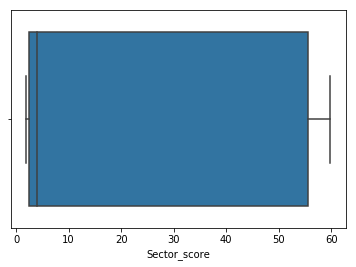

In [66]:
import seaborn as sns
sns.boxplot(x=result['Sector_score'])

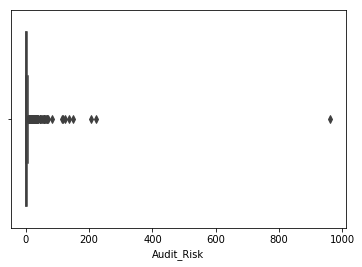

In [67]:
import seaborn as sns
sns.boxplot(x=result['Audit_Risk'])

In [68]:
result.loc[result['Audit_Risk'] == 961.514400]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,CONTROL_RISK,Detection_Risk,Audit_Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk
241,2.72,2,4.28,0.6,2.568,1264.63,0.6,758.778,1268.91,5.5,...,2.4,0.5,961.5144,4,6,6,0,2,6,1


In [69]:
i = result[result['Audit_Risk'] == 961.514400].index

In [70]:
result = result.drop(i)

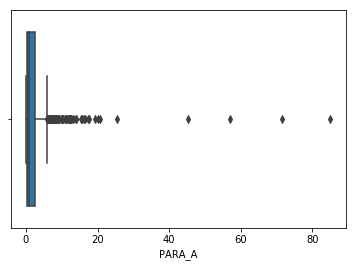

In [71]:
sns.boxplot(x=result['PARA_A'])

In [72]:
result.loc[result['PARA_A'] > 40.000000]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,CONTROL_RISK,Detection_Risk,Audit_Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk
81,3.89,2,71.48,0.6,42.888,25.63,0.6,15.378,97.11,5.0,...,0.4,0.5,116.7376,2,6,2,0,2,2,1
342,1.99,2,57.03,0.6,34.218,134.33,0.6,80.598,191.36,5.0,...,0.4,0.5,124.5676,2,6,2,0,2,2,1
467,1.85,19,45.23,0.6,27.138,36.18,0.6,21.708,81.41,5.0,...,1.2,0.5,30.6276,2,2,6,0,2,2,1
509,21.61,9,85.00,0.6,51.000,1.06,0.4,0.424,86.06,5.0,...,1.2,0.5,32.1744,2,2,6,0,2,2,1


In [73]:
i = result.loc[result['PARA_A'] > 40.000000].index

In [74]:
result = result.drop(i)

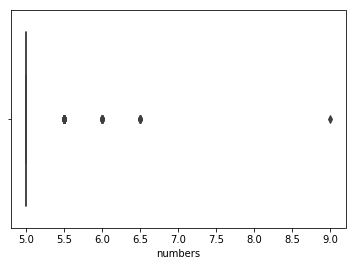

In [75]:
sns.boxplot(x=result['numbers'])

In [76]:
i = result.loc[result['numbers'] > 6.000000].index

In [77]:
result = result.drop(i)

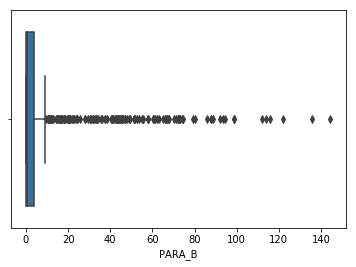

In [78]:
sns.boxplot(x=result['PARA_B'])

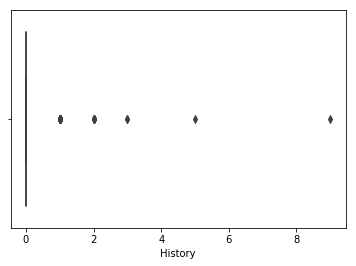

In [79]:
sns.boxplot(x=result['History'])

In [80]:
result.loc[result['History'] > 4.000000]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,CONTROL_RISK,Detection_Risk,Audit_Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk
80,3.89,2,0.00,0.2,0.000,3.72,0.2,0.744,3.72,5.0,...,5.8,0.5,21.8776,2,2,2,0,2,6,1
276,2.37,6,2.51,0.6,1.506,8.59,0.6,5.154,11.10,5.5,...,3.4,0.5,37.1926,4,6,2,0,2,6,1


In [81]:
i = result.loc[result['History'] > 4.000000].index

In [82]:
result = result.drop(i)

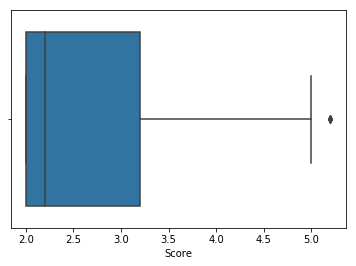

In [83]:
sns.boxplot(x=result['Score'])

In [84]:
result.loc[result['Score'] > 5.000000]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,CONTROL_RISK,Detection_Risk,Audit_Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk
93,3.89,16,15.72,0.6,9.432,57.94,0.6,34.764,73.66,6.0,...,1.2,0.5,33.2820,6,6,6,0,2,2,1
190,2.72,18,5.11,0.6,3.066,53.76,0.6,32.256,58.87,6.0,...,1.6,0.5,55.7264,6,6,2,0,2,6,1
495,15.56,1,3.73,0.6,2.238,2.82,0.6,1.692,6.55,6.0,...,1.2,0.5,62.9856,6,6,6,0,2,2,1


In [85]:
i = result.loc[result['Score'] > 5.000000].index

In [86]:
result = result.drop(i)

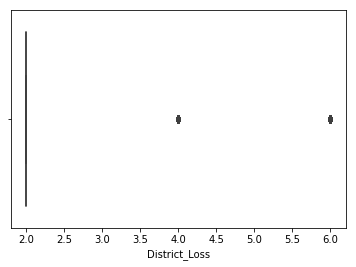

In [87]:
sns.boxplot(x=result['District_Loss'])

In [88]:
result.loc[result['District_Loss'] >= 6.000000]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,CONTROL_RISK,Detection_Risk,Audit_Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk
94,3.89,16,4.9500,0.6,2.97000,42.61,0.6,25.566,47.5600,5.0,...,1.6,0.5,25.462400,2,2,6,0,2,4,1
95,3.89,16,0.0000,0.2,0.00000,0.08,0.2,0.016,0.0800,5.0,...,1.2,0.5,1.336800,2,2,6,0,2,2,1
96,3.89,16,1.1900,0.4,0.47600,12.88,0.6,7.728,14.0700,5.0,...,1.2,0.5,6.522000,2,2,6,0,2,2,1
97,3.89,16,0.0000,0.2,0.00000,2.72,0.2,0.544,2.7200,5.0,...,1.2,0.5,2.985600,2,4,6,0,2,2,1
98,3.89,16,0.0000,0.2,0.00000,1.66,0.2,0.332,1.6600,5.0,...,1.2,0.5,1.610400,2,2,6,0,2,2,1
99,3.89,16,6.4700,0.6,3.88200,12.18,0.6,7.308,18.6500,5.0,...,1.2,0.5,17.131200,2,6,6,0,2,2,1
100,3.89,16,1.3300,0.4,0.53200,0.00,0.2,0.000,1.3300,5.0,...,1.2,0.5,1.663200,2,2,6,0,2,2,1
101,3.89,16,0.0000,0.2,0.00000,1.10,0.2,0.220,1.1000,5.0,...,1.2,0.5,1.452000,2,2,6,0,2,2,1
125,3.41,12,25.4000,0.6,15.24000,51.74,0.6,31.044,77.1400,5.0,...,2.4,0.5,68.743200,2,6,6,0,2,6,1
126,3.41,12,3.2100,0.6,1.92600,72.07,0.6,43.242,75.2800,5.0,...,1.6,0.5,44.833600,2,6,6,0,2,4,1


In [89]:
i = result.loc[result['District_Loss'] >= 6.000000].index

In [90]:
result = result.drop(i)

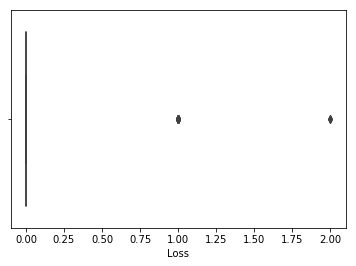

In [91]:
sns.boxplot(x=result['Loss'])

In [92]:
result.loc[result['Loss'] >= 1.000000]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,CONTROL_RISK,Detection_Risk,Audit_Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk
11,3.89,8,15.38,0.6,9.228,40.14,0.6,24.084,55.52,5.0,...,1.2,0.5,21.4224,2,2,2,1,4,4,1
50,3.89,22,1.97,0.4,0.788,2.10,0.2,0.420,4.07,5.0,...,1.2,0.5,6.4692,2,6,2,2,6,2,1
85,3.89,9,8.46,0.6,5.076,72.76,0.6,43.656,81.22,5.0,...,2.0,0.5,52.0120,2,2,2,1,4,6,1
121,3.41,27,1.41,0.4,0.564,36.16,0.6,21.696,37.57,5.0,...,1.2,0.5,19.3740,2,6,2,2,6,2,1
143,3.41,7,6.61,0.6,3.966,55.62,0.6,33.372,62.23,5.0,...,0.8,0.5,29.3736,2,6,2,1,4,2,1
151,3.41,29,12.29,0.6,7.374,25.74,0.6,15.444,38.03,5.0,...,0.8,0.5,15.1512,2,6,2,1,4,2,1
164,3.41,19,0.31,0.2,0.062,58.12,0.6,34.872,58.43,5.0,...,0.8,0.5,33.6488,2,6,2,1,4,2,1
170,3.41,2,1.18,0.4,0.472,0.00,0.2,0.000,1.18,5.5,...,0.8,0.5,45.3568,4,6,2,1,4,2,1
206,2.72,13,3.84,0.6,2.304,144.39,0.6,86.634,148.23,5.0,...,1.2,0.5,61.7676,2,6,2,1,4,4,1
219,2.72,22,3.22,0.6,1.932,55.64,0.6,33.384,58.86,5.0,...,0.8,0.5,34.2384,2,6,2,1,4,2,1


In [93]:
i = result.loc[result['Loss'] >= 1.000000].index

In [94]:
result = result.drop(i)

## PCA

In [95]:
x_pca = result[['Sector_score','PARA_A','PARA_B','numbers','Money_Value','History','Score','District_Loss','Loss']]
y_pca = result[['Audit_Risk']]

In [96]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

X_train_org_pca, X_test_org_pca, y_train_pca, y_test_pca = train_test_split(x_pca,y_pca, random_state = 0)

scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train_org_pca)
X_test_pca = scaler.transform(X_test_org_pca)

In [97]:
from sklearn.decomposition import PCA

#create model
pca = PCA(n_components= 0.95, random_state = 0)

#train pca model
pca.fit(X_train_pca)

#transforming X_train and X_test
X_train_reduced = pca.transform(X_train_pca)
X_test_reduced = pca.transform(X_test_pca)

In [98]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train_reduced, y_train_pca)
print(lreg.score(X_train_reduced, y_train_pca))
print(lreg.score(X_test_reduced, y_test_pca))

0.9155741910477005
0.8609561054304146


In [99]:
from sklearn.model_selection import cross_val_score

scores_tr = cross_val_score(lreg, X_train_reduced, y_train_pca, cv=5)
scores_ts = cross_val_score(lreg, X_test_reduced, y_test_pca, cv=5)
print("Cross-validation scores for train: {}".format(scores_tr))
print("Cross-validation scores for test : {}".format(scores_ts))
print("Average cross-validation score for train: {:.2f}".format(scores_tr.mean()))
print("Average cross-validation score for test: {:.2f}".format(scores_ts.mean()))

Cross-validation scores for train: [0.92237127 0.956345   0.82217371 0.84832153 0.86899876]
Cross-validation scores for test : [0.75260048 0.70506159 0.64873966 0.81256606 0.88283747]
Average cross-validation score for train: 0.88
Average cross-validation score for test: 0.76


In [100]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

print("Cross-validation scores for train:\n{}".format(cross_val_score(lreg, X_train_reduced, y_train_pca, cv=kfold)))
print("Cross-validation scores for test:\n{}".format(cross_val_score(lreg, X_test_reduced, y_test_pca, cv=kfold)))

Cross-validation scores for train:
[0.89992463 0.76052777 0.82312879]
Cross-validation scores for test:
[0.66791643 0.73002429 0.82760677]


Text(0.5,0,'RM')

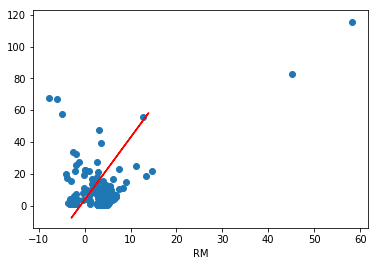

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train_reduced[:,2].reshape(-1,1)
lreg.fit(X_train_rm, y_train_pca)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(y_predict,y_train_pca)
plt.xlabel('RM')


## Polynomial Regression PCA

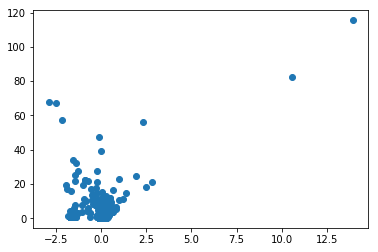

In [102]:
from  sklearn.preprocessing  import PolynomialFeatures

X_train_1 = X_train_reduced[:,2].reshape(-1,1)
plt.scatter(X_train_1,y_train_pca)

In [103]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train_reduced)
    X_test_poly = poly.transform(X_test_reduced)
    lreg.fit(X_train_poly, y_train_pca)
    train_score_list.append(lreg.score(X_train_poly, y_train_pca))
    test_score_list.append(lreg.score(X_test_poly, y_test_pca))

In [104]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lreg, X_train_poly, y_train_pca, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96369384 0.99225255 0.82511102 0.98627954 0.99550248]


In [105]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

print("Cross-validation scores for train:\n{}".format(cross_val_score(lreg, X_train_poly, y_train_pca, cv=kfold)))
print("Cross-validation scores for test:\n{}".format(cross_val_score(lreg, X_test_poly, y_test_pca, cv=kfold)))

Cross-validation scores for train:
[0.98691486 0.98894759 0.99068921]
Cross-validation scores for test:
[-0.67960018  0.53907139 -9.94325378]


In [106]:
print("Average cross-validation score for train: {:.2f}".format(scores.mean()))
print("Average cross-validation score for test: {:.2f}".format(scores_ts.mean()))

Average cross-validation score for train: 0.95
Average cross-validation score for test: 0.76


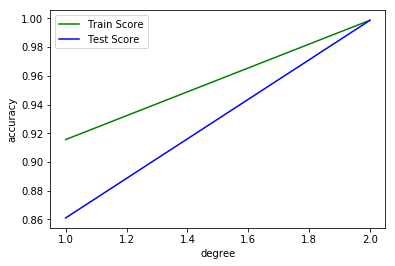

In [107]:
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

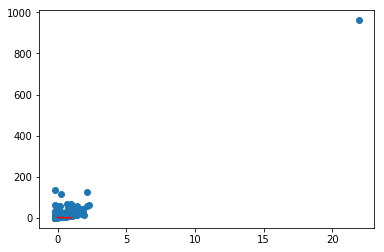

In [108]:
poly = PolynomialFeatures(n)
X_train_poly = poly.fit_transform(X_train_1)
lreg.fit(X_train_poly, y_train_pca)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)

X_train_1 = X_train[:,2].reshape(-1,1)
plt.scatter(X_train_1,y_train)
plt.plot(x_axis, y_predict, c = 'r')

## Ridge Regression

In [109]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_reduced,y_train_pca)
    train_score_list.append(ridge.score(X_train_reduced,y_train_pca))
    test_score_list.append(ridge.score(X_test_reduced, y_test_pca))

In [110]:
print(train_score_list)
print(test_score_list)

[0.9155741907721116, 0.9155741635016895, 0.9155714492737485, 0.9153122974219485, 0.8978934302943397]
[0.8609554597792989, 0.860949633967569, 0.8608899045991464, 0.8601539877500218, 0.8444465525327007]


Text(0.5,0,'$\\alpha$')

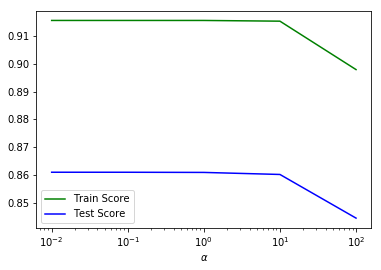

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

<font color=purple>GRID SEARCH 

In [112]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Ridge(), param_grid, return_train_score = True)
grid_search.fit(X_train_reduced, y_train_pca)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [113]:
print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'alpha': 10}


In [114]:
ridge = Ridge(alpha = 100)
ridge.fit(X_train_reduced,y_train_pca)
print('Train score: {:.4f}'.format(ridge.score(X_train_reduced,y_train_pca)))
print('Test score: {:.4f}'.format(ridge.score(X_test_reduced, y_test_pca)))

Train score: 0.8979
Test score: 0.8444


In [115]:
from sklearn.model_selection import cross_val_score

scores_tr = cross_val_score(ridge, X_train_reduced, y_train_pca, cv=5)
scores_ts = cross_val_score(ridge, X_test_reduced, y_test_pca, cv=5)
print("Cross-validation scores for train: {}".format(scores_tr))
print("Cross-validation scores for test : {}".format(scores_ts))
print("Average cross-validation score for train: {:.2f}".format(scores_tr.mean()))
print("Average cross-validation score for test: {:.2f}".format(scores_ts.mean()))

Cross-validation scores for train: [0.90918453 0.87064975 0.75000727 0.83779593 0.86690374]
Cross-validation scores for test : [0.84228429 0.65134418 0.72906353 0.47043296 0.78500438]
Average cross-validation score for train: 0.85
Average cross-validation score for test: 0.70


In [116]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

print("Cross-validation scores for train:\n{}".format(cross_val_score(ridge, X_train_reduced, y_train_pca, cv=kfold)))
print("Cross-validation scores for test:\n{}".format(cross_val_score(ridge, X_test_reduced, y_test_pca, cv=kfold)))

Cross-validation scores for train:
[0.60415944 0.68947204 0.85016398]
Cross-validation scores for test:
[0.79819734 0.65548343 0.48838024]


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">LASSO 

In [117]:
#on of them receive higher value, anf rest all are negligible
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_reduced,y_train_pca)
    train_score_list.append(lasso.score(X_train_reduced,y_train_pca))
    test_score_list.append(lasso.score(X_test_reduced, y_test_pca))

In [118]:
print(train_score_list)
print(test_score_list)

[0.9155654916351755, 0.914704249795195, 0.8387001234473922, 0.1855708524705515, 0.0]
[0.86065491750175, 0.8572228064206026, 0.7727388818949907, 0.23620740862895595, -0.0007457408497821838]


Text(0.5,0,'$\\alpha$')

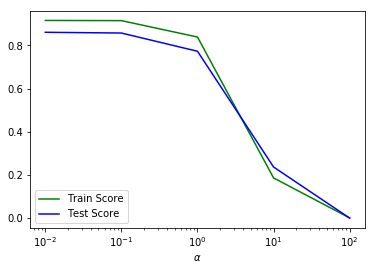

In [119]:
#suggests smaller power of alpha is the best parameter, power of 2
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

<font color=purple>GRID SEARCH 

In [120]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Lasso(), param_grid, return_train_score = True)
grid_search.fit(X_train_reduced, y_train_pca)

print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'alpha': 0.1}


In [121]:
lasso = Lasso(alpha = 100)
lasso.fit(X_train_reduced,y_train_pca)
print('Train score: {:.4f}'.format(ridge.score(X_train_reduced,y_train_pca)))
print('Test score: {:.4f}'.format(ridge.score(X_test_reduced, y_test_pca)))

Train score: 0.8979
Test score: 0.8444


<font color=purple>CROSS VALIDATION scores

In [122]:
from sklearn.model_selection import cross_val_score

scores_tr = cross_val_score(lasso, X_train_reduced, y_train_pca, cv=5)
scores_ts = cross_val_score(lasso, X_test_reduced, y_test_pca, cv=5)
print("Cross-validation scores for train: {}".format(scores_tr))
print("Cross-validation scores for test : {}".format(scores_ts))
print("Average cross-validation score for train: {:.2f}".format(scores_tr.mean()))
print("Average cross-validation score for test: {:.2f}".format(scores_ts.mean()))

Cross-validation scores for train: [-3.79430171e-03 -2.22212602e-05 -9.53952439e-04 -1.46277693e-02
 -1.61216950e-05]
Cross-validation scores for test : [-3.12012672e-02 -2.23446537e-02 -9.70854712e-02 -4.31044748e-03
 -5.88169414e-05]
Average cross-validation score for train: -0.00
Average cross-validation score for test: -0.03


In [123]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

print("Cross-validation scores for train:\n{}".format(cross_val_score(lasso, X_train_reduced, y_train_pca, cv=kfold)))
print("Cross-validation scores for test:\n{}".format(cross_val_score(lasso, X_test_reduced, y_test_pca, cv=kfold)))

Cross-validation scores for train:
[-0.00450922 -0.00072537 -0.00661395]
Cross-validation scores for test:
[-2.37984342e-02 -1.56842050e-07 -5.96000207e-03]


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">KNN Regressor

In [124]:
from sklearn.neighbors import KNeighborsRegressor

Text(0,0.5,'MSE')

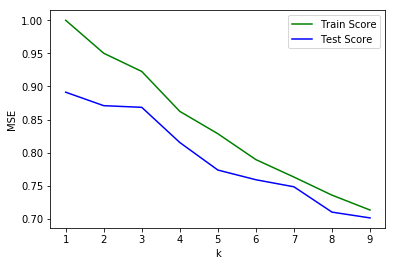

In [125]:
#this generally overfits, but if still if we want, we choose 1, since atleast 
#the test and train score is highest
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train_reduced, y_train_pca)
    train_score_array.append(knn_reg.score(X_train_reduced, y_train_pca))
    test_score_array.append(knn_reg.score(X_test_reduced, y_test_pca))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [126]:
print(train_score_array)
print(test_score_array)


[1.0, 0.9501660764620422, 0.9226776686689147, 0.8623576281734537, 0.8286342584213355, 0.7895475736988999, 0.7632004278702188, 0.7358896380674063, 0.7133937487589562]
[0.8913583940961034, 0.8710017428478078, 0.8684940965612707, 0.8153641000549217, 0.7737884303027047, 0.759134312548861, 0.7484991474824858, 0.7102544666977644, 0.7014985706723535]


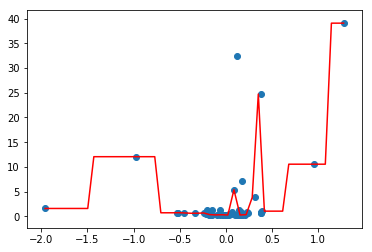

In [127]:

X_b = X_train_reduced[:50,6].reshape(-1,1)
y_b = y_train_pca[:50]

knn_reg = KNeighborsRegressor(1)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)

<font color=purple>CROSS VALIDATION SCORES

In [128]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

print("Cross-validation scores for train:\n{}".format(cross_val_score(knn_reg, X_train_reduced, y_train_pca, cv=kfold)))
print("Cross-validation scores for test:\n{}".format(cross_val_score(knn_reg, X_test_reduced
                                                                     , y_test_pca, cv=kfold)))

Cross-validation scores for train:
[0.75118328 0.77455652 0.80809642 0.87815124 0.69810887]
Cross-validation scores for test:
[0.90955034 0.83075882 0.62060624 0.31178303 0.55029848]


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">  SVR

In [129]:
from sklearn.model_selection import KFold
from sklearn.svm import SVR
kfold1 = KFold(n_splits = 4, random_state=0)
from sklearn.model_selection import cross_val_score

In [130]:
svr_l = SVR(kernel = 'linear', C = 100, gamma = 10)
svr_l.fit(X_train_reduced, y_train_pca)
print(svr_l.score(X_train_reduced, y_train_pca))
print(svr_l.score(X_test_reduced, y_test_pca))

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.901270191163776
0.8299719201171695


In [131]:
svr_r = SVR(kernel = 'rbf', C = 100, gamma = 10)
svr_r.fit(X_train_reduced, y_train_pca)
print(svr_r.score(X_train_reduced, y_train_pca))
print(svr_r.score(X_test_reduced, y_test_pca))

0.9996691509699482
0.42139847246393225


C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<font color=purple>GRID SEARCH for best parameters

In [132]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 0.5, 10, 100], 'max_iter' :[50000]}
grid_search = GridSearchCV(LinearSVR(), param_grid, cv=kfold1, return_train_score = True)

grid_search.fit(X_train_reduced, y_train_pca)

test = cross_val_score(grid_search, X_test_reduced, y_test_pca, scoring='r2',cv=kfold1).mean()

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [133]:
print("Train Score: {:.5f}".format(grid_search.best_score_))
print("Test Score: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train Score: 0.84968
Test Score: 0.79888
best parameters are: {'C': 10, 'max_iter': 50000}


In [134]:
lsvr = LinearSVR(C = 10, max_iter = 50000)

In [135]:
lsvr.fit(X_train_reduced, y_train_pca)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVR(C=10, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=50000,
     random_state=None, tol=0.0001, verbose=0)

In [136]:
print('Train score: {:.4f}'.format(lsvr.score(X_train_reduced,y_train_pca)))
print('Test score: {:.4f}'.format(lsvr.score(X_test_reduced, y_test_pca)))

Train score: 0.8939
Test score: 0.8294


In [137]:
from sklearn.model_selection import KFold
kfold1 = KFold(n_splits = 5, random_state=0)
from sklearn.model_selection import cross_val_score

In [138]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 0.5, 10, 100], 'max_iter' :[50000]}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=kfold1, return_train_score = True)

grid_search.fit(X_train_reduced, y_train_pca)

test = cross_val_score(grid_search, X_test_reduced, y_test_pca, scoring='r2',cv=kfold1).mean()

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [139]:
print("Train Score: {:.5f}".format(grid_search.best_score_))
print("Test Score: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train Score: 0.68755
Test Score: 0.66147
best parameters are: {'C': 100, 'max_iter': 50000}


In [140]:
svrbf = SVR(kernel='rbf', C = 100, max_iter = 50000)

In [141]:
svrbf.fit(X_train_reduced, y_train_pca)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=50000, shrinking=True, tol=0.001, verbose=False)

In [142]:
print('Train score: {:.4f}'.format(svrbf.score(X_train_reduced,y_train_pca)))
print('Test score: {:.4f}'.format(svrbf.score(X_test_reduced, y_test_pca)))

Train score: 0.9999
Test score: 0.8938


<font color='purple'>CROSS VALIDATION

In [143]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

print("Cross-validation scores of linear for train:\n{}".format(cross_val_score(svr_l, X_train_reduced, y_train_pca, cv=kfold)))
print("Cross-validation scores of linear for test:\n{}".format(cross_val_score(svr_l, X_test_reduced, y_test_pca, cv=kfold)))
print("Cross-validation scores of rbf for train:\n{}".format(cross_val_score(svr_r, X_train_reduced, y_train_pca, cv=kfold)))
print("Cross-validation scores of rbf for test:\n{}".format(cross_val_score(svr_r, X_test_reduced, y_test_pca, cv=kfold)))

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross-validation scores of linear for train:
[0.93217952 0.67640617 0.81149131]
Cross-validation scores of linear for test:
[0.91885094 0.66413691 0.73227429]
Cross-validation scores of rbf for train:
[0.22990691 0.29313814 0.60479285]
Cross-validation scores of rbf for test:
[0.52079569 0.21229357 0.20749492]


C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

## SVR Kernel Poly


In [144]:
from sklearn.model_selection import KFold
kfold1 = KFold(n_splits = 5, random_state=0)
from sklearn.model_selection import cross_val_score

In [145]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 0.5, 10, 100], 'max_iter' :[50000]}
grid_search = GridSearchCV(SVR(kernel='poly'), param_grid, cv=kfold1, return_train_score = True)

grid_search.fit(X_train_reduced, y_train_pca)

test = cross_val_score(grid_search, X_test_reduced, y_test_pca, scoring='r2',cv=kfold1).mean()

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [146]:
print("Train Score: {:.5f}".format(grid_search.best_score_))
print("Test Score: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train Score: 0.72051
Test Score: 0.24044
best parameters are: {'C': 0.1, 'max_iter': 50000}


In [147]:
svrp = SVR(kernel='poly', C = 0.1, max_iter = 50000)

In [148]:
svrp.fit(X_train_reduced, y_train_pca)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=50000, shrinking=True, tol=0.001, verbose=False)

In [149]:
print('Train score: {:.4f}'.format(svrp.score(X_train_reduced,y_train_pca)))
print('Test score: {:.4f}'.format(svrp.score(X_test_reduced, y_test_pca)))

Train score: 0.8848
Test score: 0.6414


## Deep Learning 

In [150]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [151]:
#step 1: build the model
model1 = Sequential()
#input layer
model1.add(Dense(20, input_dim = 7, activation = 'relu'))
#hidden layer
#output layer: no activation function
model1.add(Dense(1))

#step 2: compile the model
model1.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_squared_error'])

#step 3: train the model
model1.fit(X_train_reduced,y_train_pca, epochs = 150, batch_size = 300)

#step 4: model evaluation

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/150
498/498 [==============================] - 0s 212us/sample - loss: 106.7873 - mean_squared_error: 106.7873
Epoch 2/150
498/498 [==============================] - 0s 8us/sample - loss: 106.1561 - mean_squared_error: 106.1561
Epoch 3/150
498/498 [==============================] - 0s 10us/sample - loss: 105.5513 - mean_squared_error: 105.5513
Epoch 4/150
498/498 [==============================] - 0s 8us/sample - loss: 105.0902 - mean_squared_error: 105.0902
Epoch 5/150
498/498 [==============================] - 0s 8us/sample - loss: 104.5552 - mean_squared_error: 104.5552
Epoch 6/150
498/498 [==============================] - 0s 9us/sample - loss: 103.9219 - mean_squared_error: 103.9219
Epoch 7/150
498/498 [==============================] - 0s 8us/sample - loss: 103.4656 - mean_squared_error: 103.4657
Epoch 8/15

498/498 [==============================] - 0s 6us/sample - loss: 32.3214 - mean_squared_error: 32.3214
Epoch 135/150
498/498 [==============================] - 0s 10us/sample - loss: 31.9320 - mean_squared_error: 31.9320
Epoch 136/150
498/498 [==============================] - 0s 11us/sample - loss: 31.4488 - mean_squared_error: 31.4488
Epoch 137/150
498/498 [==============================] - 0s 8us/sample - loss: 30.9481 - mean_squared_error: 30.9481
Epoch 138/150
498/498 [==============================] - 0s 6us/sample - loss: 30.4998 - mean_squared_error: 30.4998
Epoch 139/150
498/498 [==============================] - 0s 8us/sample - loss: 30.0648 - mean_squared_error: 30.0648
Epoch 140/150
498/498 [==============================] - 0s 8us/sample - loss: 29.5259 - mean_squared_error: 29.5259
Epoch 141/150
498/498 [==============================] - 0s 8us/sample - loss: 29.1527 - mean_squared_error: 29.1527
Epoch 142/150
498/498 [==============================] - 0s 6us/sample - los

In [152]:
model1.evaluate(X_train_reduced, y_train_pca)

498/498 [==============================] - 0s 126us/sample - loss: 24.9915 - mean_squared_error: 24.9915


[24.99153002390421, 24.99153]

In [153]:
model1.evaluate(X_test_reduced, y_test_pca)

166/166 [==============================] - 0s 33us/sample - loss: 22.6933 - mean_squared_error: 22.6933


[22.693267029452038, 22.693266]

In [154]:
from sklearn.metrics import r2_score
y_pred = model1.predict(X_train_reduced)

In [155]:
r2_score(y_train_pca, model1.predict(X_train_reduced))

0.7479094761826908

In [156]:
r2_score(y_test_pca, model1.predict(X_test_reduced))

0.6742123747718369

# CLASSIFICATION TASK 

In [157]:
x = result[['Sector_score','PARA_A','PARA_B','numbers','Money_Value','History','Score','District_Loss','Loss']]
y = result[['Risk']]

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train_org, X_test_org , y_train, y_test = train_test_split(x, y, random_state = 0)

scaler = MinMaxScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [159]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve

# HARD AND SOFT VOTING

In [160]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression



log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)#do for each of the models
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C = 10, probability = True)#soft voting
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

print('SOFT VOTING')
from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

SOFT VOTING
LogisticRegression 0.9698795180722891
KNeighborsClassifier 1.0
SVC 0.9759036144578314
VotingClassifier 1.0


C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exampl

In [161]:
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

print('HARD VOTING')

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

HARD VOTING
LogisticRegression 0.9698795180722891
KNeighborsClassifier 1.0
SVC 0.9759036144578314
VotingClassifier 0.9759036144578314


C:\Users\prith\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

# BAGGING AND PASTING

LOGISTIC REGRESSION

In [162]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
#base model
logreg = LogisticRegression()

#grid params
grid_param = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
             'penalty':['l1', 'l2']}

#grid search model
log_grid= GridSearchCV(logreg, grid_param, cv = 3, n_jobs= -1, scoring='precision')

#train grid search model
log_grid.fit(X_train, y_train)



#find the best params
print('Best param:', log_grid.best_params_)
print('Best score:', log_grid.best_score_)

Best param: {'C': 0.1, 'penalty': 'l1'}
Best score: 1.0


C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [163]:
lgrg= LogisticRegression(C =0.1, penalty='l1')

In [164]:
from sklearn.ensemble import BaggingClassifier
#from sklearn.svm import SVR

#from sklearn.linear_model import LogisticRegression
#base model


#grid params
grid_param = {'n_estimators':[100, 200, 300, 400, 500, 600, 700], 
             'max_samples':[50, 100, 150, 200, 250, 300]}

#grid search model
bag_grid= GridSearchCV(BaggingClassifier(lgrg), grid_param, cv = 5)
#train grid search model
bag_grid.fit(X_train, y_train)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, error_score='raise',
       estimator=BaggingClassifier(base_estimator=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start...n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700], 'max_samples': [50, 100, 150, 200, 250, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [165]:
#find the best params
print('Best param:', bag_grid.best_params_)
print('Best score:', bag_grid.best_score_)

Best param: {'max_samples': 250, 'n_estimators': 200}
Best score: 0.9598393574297188


In [166]:
bag_clf_log = BaggingClassifier(LogisticRegression(C= 0.1, penalty= 'l1'), n_estimators=200, max_samples=250, bootstrap=True, random_state=0)

bag_clf_log.fit(X_train, y_train)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=250, n_estimators=200, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [167]:
#y_pred = bag_clf_log.predict(X_test)
print('Bagging Train score: {:.2f}'.format(bag_clf_log.score(X_train, y_train)))
print('Bagging Test score: {:.2f}'.format(bag_clf_log.score(X_test, y_test)))

Bagging Train score: 0.95
Bagging Test score: 0.97


In [168]:
bag_clf_log_p = BaggingClassifier(LogisticRegression(C= 0.1, penalty= 'l1'), n_estimators=200, max_samples=250, bootstrap=False, random_state=0)

bag_clf_log_p.fit(X_train, y_train)


C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=250, n_estimators=200, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [169]:
bag_clf_log_p = BaggingClassifier(LogisticRegression(C= 0.1, penalty= 'l1'), n_estimators=200, max_samples=250, bootstrap=False, random_state=0)

bag_clf_log_p.fit(X_train, y_train)


C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=250, n_estimators=200, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [170]:
#y_pred = bag_clf_log.predict(X_test)
print('Pasting Train score: {:.2f}'.format(bag_clf_log_p.score(X_train, y_train)))
print('Pasting Test score: {:.2f}'.format(bag_clf_log_p.score(X_test, y_test)))

Pasting Train score: 0.95
Pasting Test score: 0.97


SVC LINEAR

In [171]:
svc = SVC()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

svc_grid = GridSearchCV(SVC(kernel = 'linear'), param_grid, cv=5, return_train_score=True)


#grid search model
#log_grid= GridSearchCV(logreg, grid_param, cv = 3, n_jobs= -1, scoring='precision')

#train grid search model
svc_grid.fit(X_train, y_train)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [172]:
#find the best params
print('Best param:', svc_grid.best_params_)
print('Best score:', svc_grid.best_score_)


Best param: {'C': 10, 'gamma': 0.001}
Best score: 1.0


In [173]:
svc = SVC(C=10, gamma=0.001)#kernel='linear',

In [174]:
from sklearn.ensemble import BaggingClassifier
#from sklearn.svm import SVR

#from sklearn.linear_model import LogisticRegression
#base model


#grid params
grid_param = {'n_estimators':[100, 200, 300, 400, 500, 600, 700], 
             'max_samples':[50, 100, 150, 200, 250, 300]}

#grid search model
bag_grid= GridSearchCV(BaggingClassifier(svc), grid_param, cv = 3)
#train grid search model
bag_grid.fit(X_train, y_train)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score='raise',
       estimator=BaggingClassifier(base_estimator=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700], 'max_samples': [50, 100, 150, 200, 250, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [175]:
#find the best params
print('Best param:', bag_grid.best_params_)
print('Best score:', bag_grid.best_score_)

Best param: {'max_samples': 50, 'n_estimators': 100}
Best score: 0.6004016064257028


In [176]:
bag_clf_svclb = BaggingClassifier(SVC(kernel ='linear', C = 10, gamma = 0.01), n_estimators=100, max_samples=200, bootstrap=True, random_state=0)

bag_clf_svclb.fit(X_train, y_train)
y_pred = bag_clf_svclb.predict(X_test)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [177]:
bag_clf_svclb.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf_svclb.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf_svclb.score(X_test, y_test)))

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 1.00
Test score: 1.00


pasting

In [178]:
bag_clf_svclp = BaggingClassifier(SVC(kernel ='linear', C = 10, gamma = 0.01), n_estimators=100, max_samples=50, bootstrap=False, random_state=0)

bag_clf_svclp.fit(X_train, y_train)
y_pred = bag_clf_svclb.predict(X_test)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [179]:
bag_clf_svclp.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf_svclp.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf_svclp.score(X_test, y_test)))

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.89
Test score: 0.90


SVC rbf

In [180]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

svc_grid = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv=5, return_train_score=True)

#train grid search model
svc_grid.fit(X_train, y_train)


C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [181]:
#find the best params
print('Best param:', svc_grid.best_params_)
print('Best score:', svc_grid.best_score_)

Best param: {'C': 0.1, 'gamma': 100}
Best score: 1.0


In [182]:
svc_r= SVC(kernel='rbf', C= 0.1, gamma= 100)

In [183]:
from sklearn.ensemble import BaggingClassifier
#from sklearn.svm import SVR

#from sklearn.linear_model import LogisticRegression
#base model


#grid params
grid_param = {'n_estimators':[100, 200, 300, 400, 500, 600, 700], 
             'max_samples':[50, 100, 150, 200, 250, 300]}

#grid search model
bag_grid_svcr= GridSearchCV(BaggingClassifier(svc_r), grid_param, cv = 3)
#train grid search model
bag_grid_svcr.fit(X_train, y_train)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score='raise',
       estimator=BaggingClassifier(base_estimator=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700], 'max_samples': [50, 100, 150, 200, 250, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [184]:
#find the best params
print('Best param:', bag_grid_svcr.best_params_)
print('Best score:', bag_grid_svcr.best_score_)

Best param: {'max_samples': 200, 'n_estimators': 300}
Best score: 1.0


In [185]:
bag_clf_svcrb = BaggingClassifier(SVC(kernel ='rbf', C = 0.1, gamma = 100), n_estimators=100, max_samples=200, bootstrap=True, random_state=0)

bag_clf_svcrb.fit(X_train, y_train)
#y_pred = bag_clf_svclb.predict(X_test)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=200, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [186]:
bag_clf_svcrb.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf_svcrb.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf_svcrb.score(X_test, y_test)))

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 1.00
Test score: 1.00


Pasting

In [187]:
bag_clf_svcrp = BaggingClassifier(SVC(kernel ='rbf', C = 0.1, gamma = 100), n_estimators=100, max_samples=200, bootstrap=False, random_state=0)

bag_clf_svcrp.fit(X_train, y_train)
y_pred = bag_clf_svcrp.predict(X_test)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [188]:
bag_clf_svcrp.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf_svcrp.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf_svcrp.score(X_test, y_test)))

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 1.00
Test score: 1.00


SVC in Poly

In [189]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

svc_grid_p = GridSearchCV(SVC(kernel = 'poly'), param_grid, cv=5, return_train_score=True)

#train grid search model
svc_grid_p.fit(X_train, y_train)


C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [190]:
#find the best params
print('Best param:', svc_grid_p.best_params_)
print('Best score:', svc_grid_p.best_score_)

Best param: {'C': 10, 'gamma': 100}
Best score: 1.0


In [191]:
svc_p= SVC(kernel= 'poly', C= 10, gamma= 100 )

In [192]:
from sklearn.ensemble import BaggingClassifier
#from sklearn.svm import SVR

#from sklearn.linear_model import LogisticRegression
#base model


#grid params
grid_param = {'n_estimators':[100, 200, 300, 400, 500, 600, 700], 
             'max_samples':[50, 100, 150, 200, 250, 300]}

#grid search model
bag_grid_p= GridSearchCV(BaggingClassifier(svc_p), grid_param, cv = 3)
#train grid search model
bag_grid_p.fit(X_train, y_train)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score='raise',
       estimator=BaggingClassifier(base_estimator=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700], 'max_samples': [50, 100, 150, 200, 250, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [193]:
#find the best params
print('Best param:', bag_grid_p.best_params_)
print('Best score:', bag_grid_p.best_score_)

Best param: {'max_samples': 200, 'n_estimators': 100}
Best score: 1.0


In [194]:
bag_clf_svcpb = BaggingClassifier(SVC(kernel ='poly', C =10, gamma =100), n_estimators=100, max_samples=250, bootstrap=True, random_state=0)

bag_clf_svcpb.fit(X_train, y_train)


C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=250, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [195]:
bag_clf_svcpb.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf_svcpb.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf_svcpb.score(X_test, y_test)))

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 1.00
Test score: 1.00


pasting

In [196]:
bag_clf_svcpp = BaggingClassifier(SVC(kernel ='poly', C =10, gamma =100), n_estimators=100, max_samples=250, bootstrap=False, random_state=0)

bag_clf_svcpp.fit(X_train, y_train)


C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=250, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [197]:
bag_clf_svcpp.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf_svcpp.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf_svcpp.score(X_test, y_test)))

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 1.00
Test score: 1.00


# ADABOOST CLASSIFIER

In [198]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6]}
dt_grid = GridSearchCV(DecisionTreeClassifier(), param_grid, return_train_score = True)
dt_grid.fit(X_train, y_train)

print('Best param:', dt_grid.best_params_)
print('Best score:', dt_grid.best_score_)

Best param: {'max_depth': 1}
Best score: 1.0


In [199]:
dt= DecisionTreeClassifier(max_depth=1)

In [200]:
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.svm import SVR

#from sklearn.linear_model import LogisticRegression
#base model


#grid params
grid_param = {'n_estimators':[100, 200, 300, 400, 500, 600, 700], 
             'learning_rate':[0.25, 0.5, 0.75, 1, 1.25, 1.5, 2]}

#grid search model
ada_grid_dt= GridSearchCV(AdaBoostClassifier(dt), grid_param, cv = 5)
#train grid search model
ada_grid_dt.fit(X_train, y_train)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700], 'learning_rate': [0.25, 0.5, 0.75, 1, 1.25, 1.5, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [201]:
print('Best param:', ada_grid_dt.best_params_)
print('Best score:', ada_grid_dt.best_score_)

Best param: {'learning_rate': 0.25, 'n_estimators': 100}
Best score: 1.0


In [202]:
from sklearn.ensemble import AdaBoostClassifier


ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=100, algorithm="SAMME.R", learning_rate=0.25, random_state=0)
ada_clf.fit(X_train, y_train)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.25, n_estimators=100, random_state=0)

In [203]:
print("Accuracy on training set: {:.3f}".format(ada_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada_clf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


LOGISTIC REGRESSION

In [204]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
#base model
logreg = LogisticRegression()

#grid params
grid_param = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
             'penalty':['l1', 'l2']}

#grid search model
log_grid= GridSearchCV(logreg, grid_param, cv = 3, n_jobs= -1, scoring='precision')

#train grid search model
log_grid.fit(X_train, y_train)



#find the best params
print('Best param:', log_grid.best_params_)
print('Best score:', log_grid.best_score_)

Best param: {'C': 0.1, 'penalty': 'l1'}
Best score: 1.0


C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [205]:
logrg= LogisticRegression(C= 0.1, penalty= 'l1')

In [206]:
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.svm import SVR

#from sklearn.linear_model import LogisticRegression
#base model


#grid params
grid_param = {'n_estimators':[100, 200, 300, 400, 500, 600, 700], 
             'learning_rate':[0.25, 0.5, 0.75, 1, 1.25, 1.5, 2]}

#grid search model
ada_grid_log= GridSearchCV(AdaBoostClassifier(logrg), grid_param, cv = 5)
#train grid search model
ada_grid_log.fit(X_train, y_train)


C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700], 'learning_rate': [0.25, 0.5, 0.75, 1, 1.25, 1.5, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [207]:
print('Best param:', ada_grid_log.best_params_)
print('Best score:', ada_grid_log.best_score_)

Best param: {'learning_rate': 0.25, 'n_estimators': 100}
Best score: 0.39959839357429716


In [208]:
ada_clf_log = AdaBoostClassifier(logrg, n_estimators=100, algorithm="SAMME.R", learning_rate=0.25, random_state=0)
ada_clf_log.fit(X_train, y_train)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=0.25, n_estimators=100, random_state=0)

In [209]:
print("Accuracy on training set: {:.3f}".format(ada_clf_log.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada_clf_log.score(X_test, y_test)))

Accuracy on training set: 0.400
Accuracy on test set: 0.476


SVC

In [210]:
ada_clf_svcl = AdaBoostClassifier(SVC(C=1, gamma=0.001, kernel = 'linear'), n_estimators=200, algorithm="SAMME", learning_rate=0.5, random_state=0)
ada_clf_svcl.fit(X_train, y_train)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME',
          base_estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          learning_rate=0.5, n_estimators=200, random_state=0)

In [211]:
print("Accuracy on training set: {:.3f}".format(ada_clf_svcl.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada_clf_svcl.score(X_test, y_test)))

Accuracy on training set: 0.600
Accuracy on test set: 0.524


# GRADIENT BOOSTING

In [212]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt_dt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt_dt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt_dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt_dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [213]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# PCA

In [214]:
from sklearn.decomposition import PCA

#create model
pca = PCA(n_components= 0.95, random_state = 0)

#train pca model
pca.fit(X_train)

#transforming X_train and X_test
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

In [215]:
pca.n_components_

6

In [216]:
pca.explained_variance_

array([0.20804096, 0.09219366, 0.07016795, 0.01917128, 0.01109893,
       0.00970886])

In [217]:
pca.explained_variance_ratio_

array([0.49298331, 0.21846628, 0.16627316, 0.04542914, 0.02630053,
       0.02300655])

In [218]:
pca.n_features_

9

LOGISTIC REGRESSION

In [219]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
#base model
logreg = LogisticRegression()

#grid params
grid_param = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
             'penalty':['l1', 'l2']}

#grid search model
log_grid= GridSearchCV(logreg, grid_param, cv = 5, n_jobs= -1, scoring='precision')

#train grid search model
log_grid.fit(X_train_reduced, y_train)

#find the best params
print('Best param:', log_grid.best_params_)
print('Best score:', log_grid.best_score_)

Best param: {'C': 1, 'penalty': 'l1'}
Best score: 1.0


C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [220]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_pred = np.where(log_grid.decision_function(X_train_reduced)>-0.5, 1, 0)#what parameters are these??
print('Accuracy (0.3):', accuracy_score(y_train, y_pred))
print('Precision (0.3):', precision_score(y_train, y_pred))
print('Recall (0.3):', recall_score(y_train, y_pred))

Accuracy (0.3): 1.0
Precision (0.3): 1.0
Recall (0.3): 1.0


In [221]:
y_pred = np.where(log_grid.decision_function(X_test_reduced)>-0.5, 1, 0)
print('on test :')
print('Accuracy on train (0.3):', accuracy_score(y_test, y_pred))
print('Precision (0.3):', precision_score(y_test, y_pred))
print('Recall (0.3):', recall_score(y_test, y_pred))

on test :
Accuracy on train (0.3): 1.0
Precision (0.3): 1.0
Recall (0.3): 1.0


In [222]:
logreg = LogisticRegression(C=1, penalty = 'l1').fit(X_train_reduced, y_train)
pred_logreg = logreg.predict(X_test_reduced)
print("logreg score: {:.2f}".format(logreg.score(X_test_reduced, y_test)))


from sklearn.metrics import confusion_matrix
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))



from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logreg, target_names=["0", "1"]))

logreg score: 1.00

Logistic Regression
[[79  0]
 [ 0 87]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        79
          1       1.00      1.00      1.00        87

avg / total       1.00      1.00      1.00       166



C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC IN LINEAR, RBF, POLY

In [224]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#base model
svc = SVC(probability = True, random_state = 0, kernel = 'linear')

#grid params
grid_param = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 
             'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}

#grid search model
svc_grid_l= GridSearchCV(svc, grid_param, cv = 5, n_jobs= -1, scoring='precision')

#train grid search model
svc_grid_l.fit(X_train_reduced, y_train)

#find the best params
print('Best param:', svc_grid_l.best_params_)
print('Best score:', svc_grid_l.best_score_)

Best param: {'C': 1, 'gamma': 0.001}
Best score: 1.0


C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [225]:
y_pred = np.where(svc_grid_l.decision_function(X_train_reduced)>-0.5, 1, 0)
print('Accuracy (0.3):', accuracy_score(y_train, y_pred))
print('Precision (0.3):', precision_score(y_train, y_pred))
print('Recall (0.3):', recall_score(y_train, y_pred))

Accuracy (0.3): 1.0
Precision (0.3): 1.0
Recall (0.3): 1.0


In [226]:
svc_l = SVC(kernel = 'linear', C = 1, gamma = 0.001).fit(X_train_reduced, y_train)
pred_svc_l = svc_l.predict(X_test_reduced)
print("svc linear score: {:.2f}".format(svc_l.score(X_test_reduced, y_test)))


print("\nSVC-linear")
print(confusion_matrix(y_test, pred_svc_l))


from sklearn.metrics import classification_report

print(classification_report(y_test, pred_svc_l, target_names=["0", "1"]))

svc linear score: 0.90

SVC-linear
[[79  0]
 [17 70]]
             precision    recall  f1-score   support

          0       0.82      1.00      0.90        79
          1       1.00      0.80      0.89        87

avg / total       0.92      0.90      0.90       166



C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [227]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
svc_grid_r= GridSearchCV(SVC(kernel = 'rbf', probability = True, random_state = 0), param_grid, cv=3, return_train_score=True)

#X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
svc_grid_r.fit(X_train_reduced, y_train)

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [228]:
#find the best params
print('Best param:', svc_grid_r.best_params_)
print('Best score:', svc_grid_r.best_score_)

Best param: {'C': 0.1, 'gamma': 100}
Best score: 1.0


In [229]:
y_pred = np.where(svc_grid_r.decision_function(X_train_reduced)>-0.5, 1, 0)
print('on train :')
print('Accuracy on train (0.3):', accuracy_score(y_train, y_pred))
print('Precision (0.3):', precision_score(y_train, y_pred))
print('Recall (0.3):', recall_score(y_train, y_pred))


on train :
Accuracy on train (0.3): 1.0
Precision (0.3): 1.0
Recall (0.3): 1.0


In [230]:
y_pred = np.where(svc_grid_r.decision_function(X_test_reduced)>-0.5, 1, 0)
print('on test :')
print('Accuracy on train (0.3):', accuracy_score(y_test, y_pred))
print('Precision (0.3):', precision_score(y_test, y_pred))
print('Recall (0.3):', recall_score(y_test, y_pred))


on test :
Accuracy on train (0.3): 1.0
Precision (0.3): 1.0
Recall (0.3): 1.0


In [231]:
svc_r = SVC(kernel = 'rbf', C = 0.1, gamma = 100).fit(X_train_reduced, y_train)
pred_svc_r = svc_r.predict(X_test_reduced)
print("svc rbf score: {:.2f}".format(svc_r.score(X_test_reduced, y_test)))

print("\nSVC-rbf")
print(confusion_matrix(y_test, pred_svc_r))

from sklearn.metrics import classification_report

print(classification_report(y_test, pred_svc_r, target_names=["0", "1"]))

svc rbf score: 1.00

SVC-rbf
[[79  0]
 [ 0 87]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        79
          1       1.00      1.00      1.00        87

avg / total       1.00      1.00      1.00       166



C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [232]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
svc_grid_p = GridSearchCV(SVC(kernel = 'poly', probability = True, random_state = 0), param_grid, cv=3, return_train_score=True)

#X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
svc_grid_p.fit(X_train_reduced, y_train)

#svc_grid_l.fit(X_test_reduced, y_train)--- we dont fit to the test

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [233]:
print("Best parameters for linear SVC: {}".format(svc_grid_p.best_params_))
print("Best cross-validation score: {:.2f}".format(svc_grid_p.best_score_))

Best parameters for linear SVC: {'C': 0.001, 'gamma': 100}
Best cross-validation score: 1.00


In [234]:
y_pred = np.where(svc_grid_l.decision_function(X_train_reduced)>-0.5, 1, 0)
print('on train :')
print('Accuracy on train (0.3):', accuracy_score(y_train, y_pred))
print('Precision (0.3):', precision_score(y_train, y_pred))
print('Recall (0.3):', recall_score(y_train, y_pred))

on train :
Accuracy on train (0.3): 1.0
Precision (0.3): 1.0
Recall (0.3): 1.0


In [235]:
svc_p = SVC(kernel = 'poly', C = 0.1, gamma = 100).fit(X_train_reduced, y_train)
pred_svc_p = svc_r.predict(X_test_reduced)
print("svc rbf score: {:.2f}".format(svc_r.score(X_test_reduced, y_test)))

print("\nSVC-rbf")
print(confusion_matrix(y_test, pred_svc_r))

from sklearn.metrics import classification_report

print(classification_report(y_test, pred_svc_r, target_names=["0", "1"]))

svc rbf score: 1.00

SVC-rbf
[[79  0]
 [ 0 87]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        79
          1       1.00      1.00      1.00        87

avg / total       1.00      1.00      1.00       166



C:\Users\prith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KNN

In [237]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train_reduced, y_train)
    train_score_array.append(knn.score(X_train_reduced, y_train))
    test_score_array.append(knn.score(X_test_reduced, y_test))

C:\Users\prith\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\prith\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\prith\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\prith\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\prith\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A

In [238]:
print(train_score_array)
print(test_score_array)

[1.0, 1.0, 1.0, 1.0, 1.0, 0.9939759036144579, 0.9939759036144579, 0.9939759036144579, 0.9939759036144579, 0.9939759036144579, 0.9939759036144579, 0.9939759036144579, 0.9939759036144579, 0.9939759036144579, 0.9939759036144579, 0.9939759036144579, 0.9939759036144579, 0.9939759036144579, 0.9939759036144579]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [239]:
print("Train score: {:.2f}".format(knn.score(X_train_reduced, y_train)))
print("Test score: {:.2f}".format(knn.score(X_test_reduced, y_test)))

Train score: 0.99
Test score: 1.00


In [240]:
from sklearn.neighbors import KNeighborsClassifier
knn_e = KNeighborsClassifier().fit(X_train_reduced, y_train)
pred_knn_e = knn_e.predict(X_test_reduced)
print("Test score: {:.2f}".format(knn_e.score(X_test_reduced, y_test)))

from sklearn.metrics import confusion_matrix
print("\nKNN classifier:")
print(confusion_matrix(y_test, pred_knn_e))

from sklearn.metrics import classification_report
print(classification_report(y_test, pred_knn_e, target_names=["0", "1"]))

Test score: 1.00

KNN classifier:
[[79  0]
 [ 0 87]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        79
          1       1.00      1.00      1.00        87

avg / total       1.00      1.00      1.00       166



C:\Users\prith\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


DECISION TREE CLASSIFIER

In [241]:
from sklearn.tree import DecisionTreeClassifier


dtree = DecisionTreeClassifier(random_state=0)
#goes full length; no early stopping 
dtree.fit(X_train_reduced, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_reduced, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_reduced, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [242]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6]}
dtree_grid = GridSearchCV(DecisionTreeClassifier(), param_grid, return_train_score = True)
dtree_grid.fit(X_train_reduced, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [243]:
print("best parameters are:",dtree_grid.best_params_)
print('Best score:', dtree_grid.best_score_)

best parameters are: {'max_depth': 3}
Best score: 0.9939759036144579


In [244]:
dtree = DecisionTreeClassifier(max_depth=6, random_state=0)
#goes full length; no early stopping 
dtree.fit(X_train_reduced, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_reduced, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_reduced, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [245]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=1).fit(X_train_reduced, y_train)
pred_tree = tree.predict(X_test_reduced)
print("Test score: {:.2f}".format(tree.score(X_test_reduced, y_test)))

from sklearn.metrics import confusion_matrix
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))

from sklearn.metrics import classification_report
print(classification_report(y_test, pred_tree, target_names=["0", "1"]))

Test score: 0.90

Decision tree:
[[79  0]
 [17 70]]
             precision    recall  f1-score   support

          0       0.82      1.00      0.90        79
          1       1.00      0.80      0.89        87

avg / total       0.92      0.90      0.90       166



# DEEP LEARNING

MODEL: PERCEPTRON

In [246]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [247]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [248]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(10, input_dim = 9, activation = 'relu'))
#hidden layers
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

#step 2: make computational graph - compile
model1.compile(loss= 'mse' , optimizer = 'adam',metrics = ['accuracy'] )

#step 3: train the model - fit
model1.fit(X_train, y_train, epochs = 50, batch_size = 300)

#step 4: evaluation

Epoch 1/50
498/498 [==============================] - 0s 266us/sample - loss: 0.2510 - acc: 0.5482
Epoch 2/50
498/498 [==============================] - 0s 8us/sample - loss: 0.2500 - acc: 0.5502
Epoch 3/50
498/498 [==============================] - 0s 8us/sample - loss: 0.2489 - acc: 0.5743
Epoch 4/50
498/498 [==============================] - 0s 8us/sample - loss: 0.2478 - acc: 0.5823
Epoch 5/50
498/498 [==============================] - 0s 8us/sample - loss: 0.2468 - acc: 0.5884
Epoch 6/50
498/498 [==============================] - 0s 7us/sample - loss: 0.2458 - acc: 0.5924
Epoch 7/50
498/498 [==============================] - 0s 8us/sample - loss: 0.2448 - acc: 0.5924
Epoch 8/50
498/498 [==============================] - 0s 6us/sample - loss: 0.2439 - acc: 0.5924
Epoch 9/50
498/498 [==============================] - 0s 6us/sample - loss: 0.2429 - acc: 0.5924
Epoch 10/50
498/498 [==============================] - 0s 9us/sample - loss: 0.2421 - acc: 0.5944
Epoch 11/50
498/498 [======

In [249]:
model1.evaluate(X_train, y_train)

498/498 [==============================] - 0s 126us/sample - loss: 0.2127 - acc: 0.6004


[0.21274458554135747, 0.6004016]

In [250]:
model1.evaluate(X_test, y_test)

166/166 [==============================] - 0s 32us/sample - loss: 0.2180 - acc: 0.5241


[0.21796231223158088, 0.52409637]

MLP

In [251]:
#step 1: build model
model2 = Sequential()
#input layer
model2.add(Dense(20, input_dim = 9, activation = 'relu'))
#hidden layers
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(5, activation = 'relu'))
#output layer
model2.add(Dense(1, activation = 'sigmoid'))

#step 2: compile the model
model2.compile(loss= 'mse' , optimizer = 'adam',metrics = ['accuracy'] )

#step 3: train the model
model2.fit(X_train, y_train, epochs = 30, batch_size = 150)

#step 4: evaluate

Epoch 1/30
498/498 [==============================] - 0s 486us/sample - loss: 0.2551 - acc: 0.3795
Epoch 2/30
498/498 [==============================] - 0s 14us/sample - loss: 0.2489 - acc: 0.6064
Epoch 3/30
498/498 [==============================] - 0s 14us/sample - loss: 0.2436 - acc: 0.6807
Epoch 4/30
498/498 [==============================] - 0s 16us/sample - loss: 0.2394 - acc: 0.7108
Epoch 5/30
498/498 [==============================] - 0s 14us/sample - loss: 0.2355 - acc: 0.7349
Epoch 6/30
498/498 [==============================] - 0s 13us/sample - loss: 0.2319 - acc: 0.7490
Epoch 7/30
498/498 [==============================] - 0s 20us/sample - loss: 0.2285 - acc: 0.7510
Epoch 8/30
498/498 [==============================] - 0s 13us/sample - loss: 0.2251 - acc: 0.7510
Epoch 9/30
498/498 [==============================] - 0s 16us/sample - loss: 0.2218 - acc: 0.7490
Epoch 10/30
498/498 [==============================] - 0s 19us/sample - loss: 0.2183 - acc: 0.7490
Epoch 11/30
498/49

In [252]:
model2.fit(X_train, y_train, epochs = 30, batch_size = 150)

Epoch 1/30
498/498 [==============================] - 0s 22us/sample - loss: 0.1198 - acc: 0.9378
Epoch 2/30
498/498 [==============================] - 0s 12us/sample - loss: 0.1158 - acc: 0.9378
Epoch 3/30
498/498 [==============================] - 0s 14us/sample - loss: 0.1119 - acc: 0.9378
Epoch 4/30
498/498 [==============================] - 0s 13us/sample - loss: 0.1082 - acc: 0.9378
Epoch 5/30
498/498 [==============================] - 0s 15us/sample - loss: 0.1045 - acc: 0.9378
Epoch 6/30
498/498 [==============================] - 0s 12us/sample - loss: 0.1012 - acc: 0.9418
Epoch 7/30
498/498 [==============================] - 0s 14us/sample - loss: 0.0977 - acc: 0.9518
Epoch 8/30
498/498 [==============================] - 0s 16us/sample - loss: 0.0942 - acc: 0.9558
Epoch 9/30
498/498 [==============================] - 0s 14us/sample - loss: 0.0908 - acc: 0.9578
Epoch 10/30
498/498 [==============================] - 0s 14us/sample - loss: 0.0874 - acc: 0.9578
Epoch 11/30
498/498

In [253]:
model2.evaluate(X_train, y_train)

498/498 [==============================] - 0s 148us/sample - loss: 0.0443 - acc: 0.9639


[0.04431599474336249, 0.96385545]

In [254]:
model2.evaluate(X_test, y_test)

166/166 [==============================] - 0s 30us/sample - loss: 0.0425 - acc: 0.9819


[0.04252205881099385, 0.9819277]

# CONCLUSION

The comparision of accuracy scores are tabulated in the file below. We see for many cases, PCA 
don't necessarily improve the scores, however, it speed up the processing speed and hence is required in datasets with big
columns values.

In [256]:
PCA = pd.read_csv('PCA comparison.csv')

In [257]:
PCA

,Model,Regression,Regression with PCA
0,Linear Regression,0.941816678800454\n0.9186754620340319,\n0.9155741910477005 0.8609561054304146
1,Polynomial regression,0.998967852812949 0.99860111895787,0.998746127012955 0.9987362445124777
2,Ridge regression,0.9418 0.9187,0.8979 0.8444
3,Lasso Regression,0.941794184561213 0.9182640925282302,0.9147 0.8572
4,KNN Regression,0.922311941343433 0.8881863460878919,0.950166076462042 0.8710017428478078
5,SVR Linear,0.89534 0.89188,0.901270191163776 0.8299719201171695
6,SVR rbf,0.71018 0.69085,0.9996691509699482\n0.42139847246393225
7,SVR Poly,0.75328 0.82474,0.8848 0.6414
8,NaN,NaN,NaN
9,Model,Classification,Classification with PCA


We have also made a compariion of the scores of classification files as below

In [258]:
prf = pd.read_csv('prf.csv')

In [259]:
prf

,Unnamed: 0,WITHOUT PCA,Unnamed: 2,Unnamed: 3,WITH PCA,Unnamed: 5,Unnamed: 6
0,NaN,precision,recall,f-1,precision,recall,f-1
1,LOGISTIC,0.97,0.97,0.97,0.92,0.9,0.9
2,KNN,1,1,1,1,1,1
3,SVC LINEAR,0.99,0.99,0.99,0.92,0.9,0.9
4,SVC RBF,0.81,0.76,0.66,1,1,1
5,SVC POLY,0.88,0.87,0.8,1,1,1
6,DECISION TREE,1,1,1,1,1,1
